# Important module and library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Load the dataset

In [ ]:
potato_data=pd.read_csv("/content/PotatoPrice.csv")

In [ ]:
potato_data.columns

Index(['potato_kg', 'price'], dtype='object')

In [ ]:
potato_data.shape

(10, 2)

In [ ]:
potato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   potato_kg  10 non-null     int64
 1   price      10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [ ]:
potato_data.describe()

,potato_kg,price
count,10.00000,10.000000
mean,5.50000,65.000000
std,3.02765,40.620192
min,1.00000,10.000000
25%,3.25000,28.750000
50%,5.50000,65.000000
75%,7.75000,97.500000
max,10.00000,120.000000


In [ ]:
potato_data.isnull().sum()

potato_kg    0
price        0
dtype: int64

# Visualization data in graphical representation

Text(0, 0.5, 'potato price')

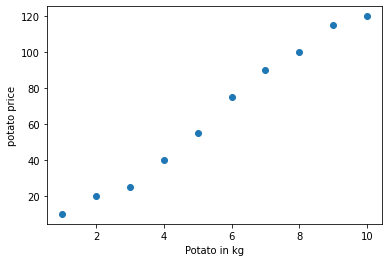

In [ ]:
plt.scatter(potato_data.potato_kg,potato_data.price)
plt.xlabel("Potato in kg")
plt.ylabel("potato price")

In [ ]:
X=potato_data[["potato_kg"]]#since x have to be two dimentional or 2D array. So [[]]

In [ ]:
X

,potato_kg
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y=potato_data["price"]

# Split Dataset for Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X , y ,test_size=0.2,random_state=1)

In [ ]:
X_train

,potato_kg
6,7
4,5
0,1
3,4
1,2
7,8
8,9
5,6


In [ ]:
X_test

,potato_kg
2,3
9,10


In [ ]:
Y_test

2     25
9    120
Name: price, dtype: int64

In [ ]:
Y_train

6     90
4     55
0     10
3     40
1     20
7    100
8    115
5     75
Name: price, dtype: int64

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
regressor.score(X_test,Y_test)

0.9751089338945893

In [ ]:
from sklearn import metrics as m
#print("10% mean of the target variable:- ",(potato_data["price"].mean()*10)/100)
print("Mean absolute error:- ",m.mean_absolute_error(Y_test,y_pred))
print("Root mean squared error:- ",np.sqrt(m.mean_absolute_error(Y_test,y_pred)))
print("Mean squared error :- ",m.mean_squared_error(Y_test,y_pred))

Mean absolute error:-  7.488738738738746
Root mean squared error:-  2.7365559995619946
Mean squared error :-  56.160467900332876


As we can see that the RMSE value is lower than the 10% mean value of the target column means our model is predicting very well

In [ ]:
#let make a small working model to real time data
x=float(input("Enter the potato in kg upto 1 kg :- "))
user_input=[[x]]
user_pred=regressor.predict(user_input)
price=np.array(user_pred)
price=price.item()
print("So",x,"kg potato price will be ", price)

Enter the potato in kg upto 1 kg :- 3
So 3.0 kg potato price will be  32.770270270270274


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
